# Imports

In [1]:
import pickle
import numpy as np
from random import shuffle
from agent_code.my_agent.algorithms import *
from settings import s
import time
import matplotlib.pyplot as plt
import copy
import os

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


# Training Weights from Simple Agent

In [3]:
def train_game(data, weights, alpha, gamma):
    for i in range(len(data)-1):
        prev_state = data[i]['state']
        prev_action = data[i]['action']
        next_state = data[i+1]['state']
        next_action = data[i+1]['action']
        
        reward = -1
        
        if data[i]['state']['step'] != 1:
            for event in data[i]['events']:
                if event == e.BOMB_DROPPED:
                    reward += 1
                elif event == e.COIN_COLLECTED:
                    reward += 100
                elif event == e.KILLED_SELF:
                    reward -= 100
                elif event == e.CRATE_DESTROYED:
                    reward += 10
                elif event == e.COIN_FOUND:
                    reward += 30
                elif event == e.KILLED_OPPONENT:
                    reward += 300
                elif event == e.GOT_KILLED:
                    reward -= 300
                elif event == e.SURVIVED_ROUND:
                    reward += 100
                elif event == e.INVALID_ACTION:
                    reward -= 2


                
        
        f0 = np.ones(6)  # for bias
        f1 = feature1(next_state) # reward good action
        f2 = feature2(next_state) # penalization bad action
        f3 = feature3(next_state)
        f4 = feature4(next_state) # reward good action
        f5 = feature5(next_state)  # penalize bad action
        f6 = feature6(next_state)  # reward good action
        f7 = feature7(next_state) # reward action
        #f8 = feature8(next_state) # rewards good action
        f9 = feature9(next_state) # rewards good action
        f10 = feature10(next_state) # rewards good action
        f11 = feature11(next_state)
        f12 = feature12(next_state)
        f13 = feature13(next_state)
        f14 = feature14(next_state)
        f15 = feature15(next_state)
        next_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
          
        f0 = np.ones(6)  # for bias
        f1 = feature1(prev_state) # reward good action
        f2 = feature2(prev_state) # penalization bad action
        f3 = feature3(prev_state)
        f4 = feature4(prev_state) # reward good action
        f5 = feature5(prev_state)  # penalize bad action
        f6 = feature6(prev_state)  # reward good action
        f7 = feature7(prev_state) # reward action
        #f8 = feature8(prev_state) # rewards good action
        f9 = feature9(prev_state) # rewards good action
        f10 = feature10(prev_state) # rewards good action
        f11 = feature11(prev_state)
        f12 = feature12(prev_state)
        f13 = feature13(prev_state)
        f14 = feature14(prev_state)
        f15 = feature15(prev_state)
        prev_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
        prev_sa = prev_state[s.actions.index(prev_action),:]
        
        new_weights = q_gd_linapprox(next_state, prev_sa, reward, 
                                     weights, alpha, gamma)
        weights = new_weights
        
        alpha = 1/data[i]['state']['step']
        #gamma = gamma**data[i]['state']['step']
        
    return weights   

In [ ]:
alpha = 0.2
gamma = 0.95
weights1 = np.ones(15)
for file in os.listdir('data-collect'):
   if file.__contains__('game_'):
        print(file)
        f = open('data-collect/'+file, 'rb')
        data = sorted(pickle.load(f), key = lambda k: k['state']['step'])
        weights1 = train_game(data, weights, alpha, gamma)
        

# Training Results

In [2]:
from jupyterthemes import jtplot
jtplot.reset()

In [53]:
y1 = np.load('train_weights_greed_batch_handpicked_init_.npy')
#y2 = np.load('training_res/batch_update/train_rewards_greed_batch_handpicked_init_.npy')
size = int(len(y1)/14)
weights = y1.reshape((size, 14))
#plt.figure(figsize=(20, 10))
#for feat in range(14):
#    plt.plot(x, weights[:,feat], label='feature {}'.format(feat+1))

#plt.title('Feature Changes During Greedy Training with Initial Value 1')
#plt.xlabel('Episodes')
#plt.ylabel('Weight Values')
#plt.legend()
#plt.show()
#print(np.load('training_res/batch_update/weights_greed_batch_handpicked_init_.npy'))


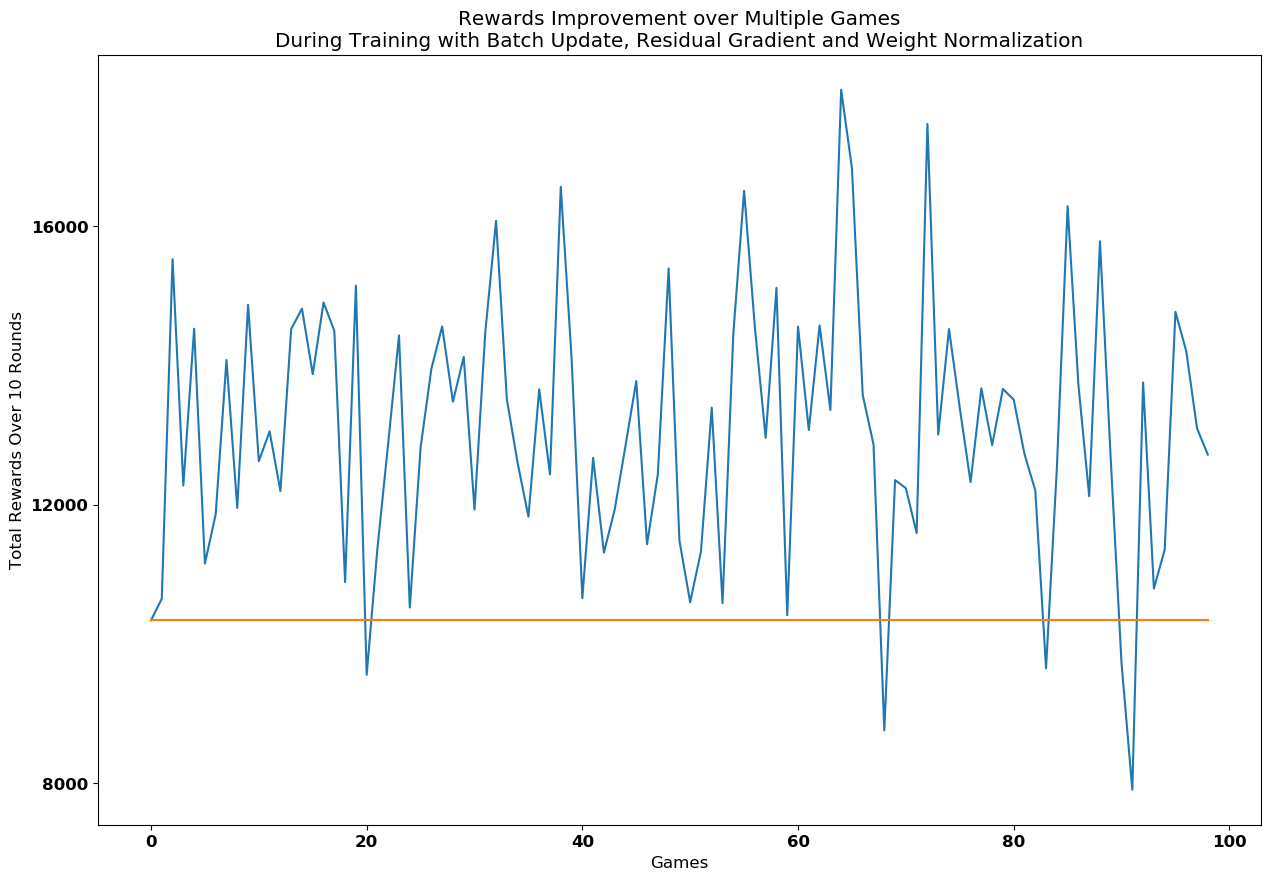

13076.555555555555


In [194]:
rewards = [line.rstrip('\n') for line in open('C:/Users/Lily/Desktop/rewards.txt')]
rewards[0] = '10337'
rewards = [int(s) for s in rewards]
x = np.arange(len(rewards))

plt.figure(figsize=(15,10))
plt.plot(np.arange(len(rewards)), rewards)
plt.plot(x, [10337]*len(x))
plt.title("Rewards Improvement over Multiple Games\nDuring Training with Batch Update, Residual Gradient and Weight Normalization")
plt.ylabel("Total Rewards Over 10 Rounds")
plt.xlabel("Games")
plt.yticks(np.arange(8000, 18000, step=4000 ))
font = {'family' : 'sans-serif',
        'size'   : '12'}

plt.rc('font', **font)  # pass in the font dict as kwargs
plt.show()

print(np.average(rewards))

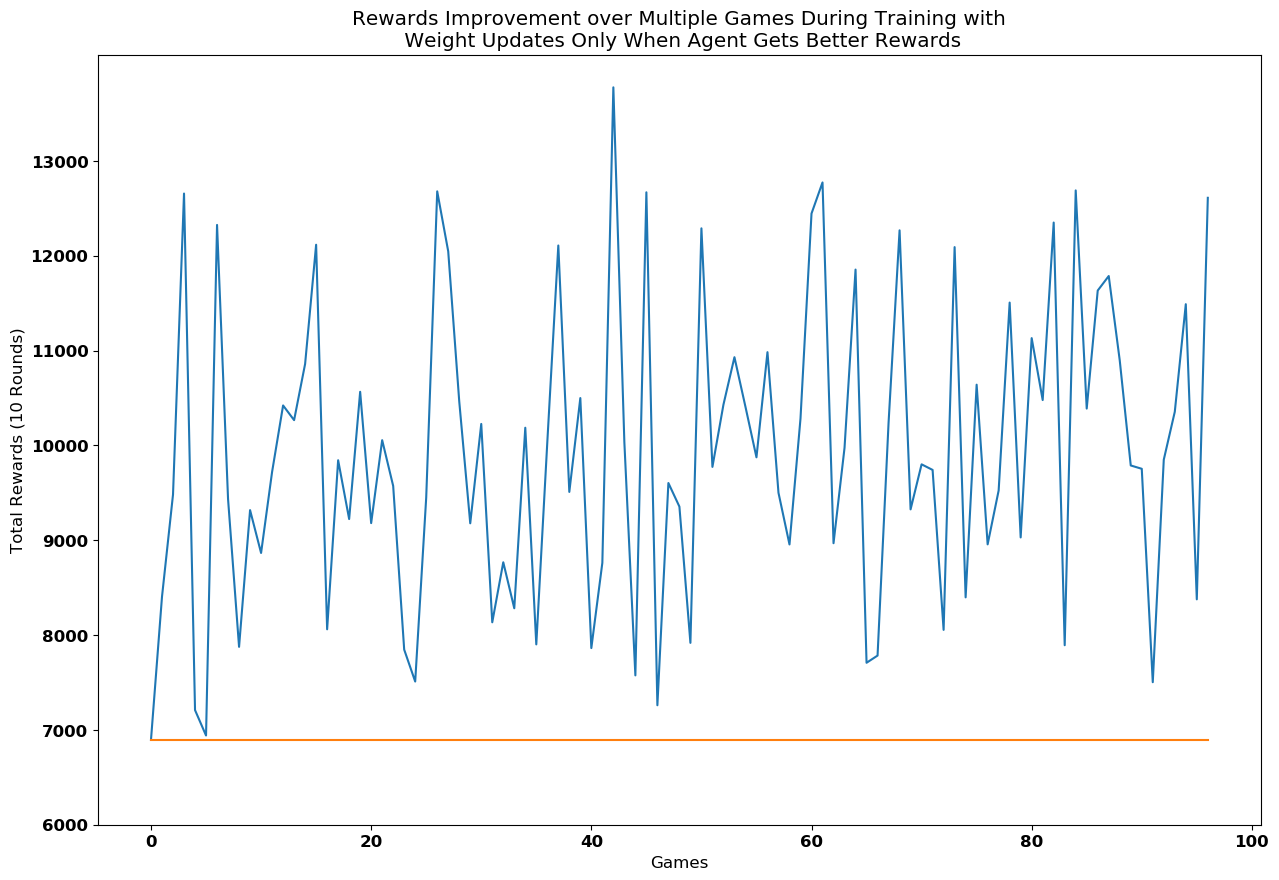

9922.298969072164
6896


In [199]:
rewards = [line.rstrip('\n') for line in open('C:/Users/Lily/Desktop/rewards_3.txt')]
rewards[0] = '6896'
rewards = [int(s) for s in rewards]
y = np.asarray(rewards)
x = np.arange(len(rewards))
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(rewards)), rewards)
plt.plot(x, [6896]*len(x))
plt.title("Rewards Improvement over Multiple Games During Training with\n Weight Updates Only When Agent Gets Better Rewards")
plt.ylabel("Total Rewards (10 Rounds)")
plt.xlabel("Games")
plt.yticks(np.arange(6000, 14000, step=1000 ))
plt.show()

print(np.average(rewards))
print(np.min(y))

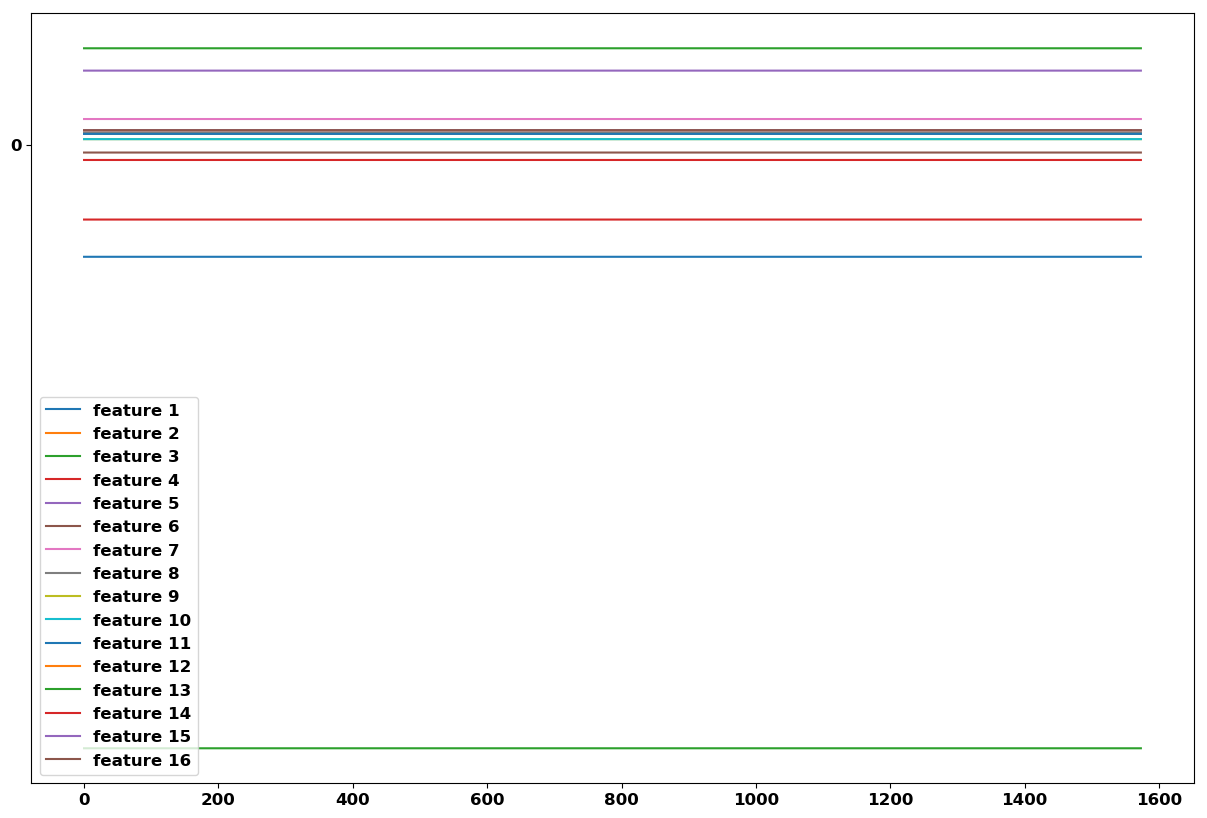

[-0.17686367  0.01768637 -0.95506384 -0.02358182  0.11790912 -0.01179091
  0.04126819  0.02004455  0.00943273  0.00943273  0.01768637  0.02358182
  0.15328185 -0.11790912  0.02358182  0.02358182]


In [216]:
tw = np.load("training_res/update_only_good_rewards/train_weights_update_good_r.npy")
w = np.load("training_res/update_only_good_rewards/weights_update_good_r.npy")
tw = tw.reshape(1574, 16)
x = np.arange(1574)


plt.figure(figsize=(15,10))
for feat in range(16):
    plt.plot(x, tw[:,feat], label='feature {}'.format(feat+1))

plt.yticks(np.arange(0, 1))
plt.legend()
plt.show()
print(w)